In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [20]:
df = pd.read_csv("Social_Network_Ads.csv")

In [21]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [23]:
df['Gender_dum'] = pd.get_dummies(df['Gender'],prefix='Gender',drop_first=True)

In [24]:
training_data = df[['Gender_dum', 'Age', 'EstimatedSalary', 'Purchased']]

In [25]:
training_data.head()

,Gender_dum,Age,EstimatedSalary,Purchased
0,1.0,19,19000,0
1,1.0,35,20000,0
2,0.0,26,43000,0
3,0.0,27,57000,0
4,1.0,19,76000,0


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [30]:
scaler.fit(training_data.drop('Purchased',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
scaled_features = scaler.transform(training_data.drop('Purchased',axis=1))

In [32]:
df_feat = pd.DataFrame(scaled_features,columns=training_data.columns[:-1])
df_feat.head()

,Gender_dum,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


In [33]:
from sklearn.cross_validation import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,training_data['Purchased'],
                                                    test_size=0.30)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

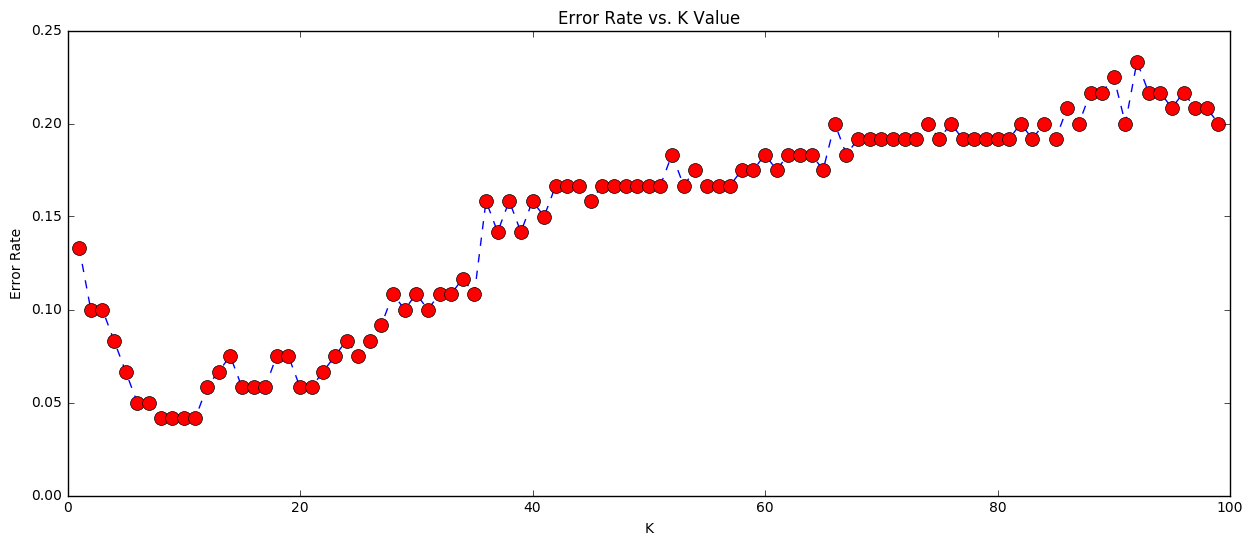

In [44]:
plt.figure(figsize=(15,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[71  9]
 [ 7 33]]


             precision    recall  f1-score   support

          0       0.91      0.89      0.90        80
          1       0.79      0.82      0.80        40

avg / total       0.87      0.87      0.87       120



In [48]:
# NOW WITH K=65
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=65')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=65


[[75  5]
 [ 4 36]]


             precision    recall  f1-score   support

          0       0.95      0.94      0.94        80
          1       0.88      0.90      0.89        40

avg / total       0.93      0.93      0.93       120

